In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


**The "black_friday_train" dataset has been used here for the further analysis**

In [ ]:
csv_file_name = "/content/black_friday_train.csv"


In [ ]:
df = pd.read_csv( csv_file_name )
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**In this dataset the primary objective is to predict if a certain product was
Purchased or not.
So the target_column_name is "Purchase"<br>**


In [ ]:
target_column_name = "Purchase"

**The value is numerical**

In [ ]:
#categorical_target_column = True
categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 550068
Total Number of Columns : 12


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

OBSERVATION

---

There are total 550068 data points in this dataset .


Text(0.5, 1.0, 'Total Number of Null values for Each Column')

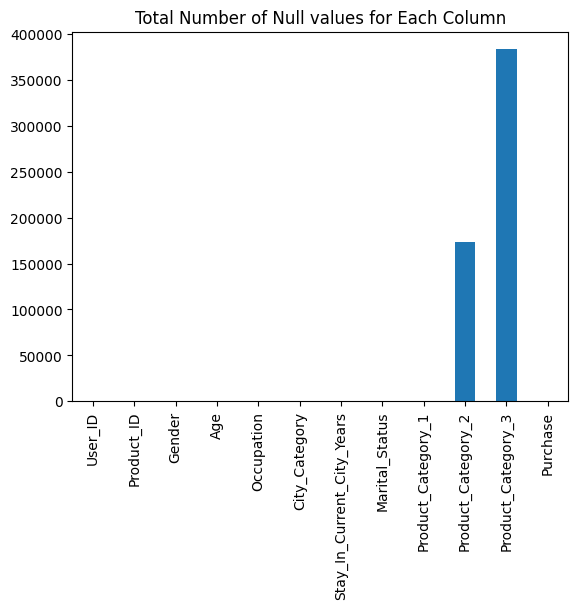

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

OBSERVATION

---

Product_Category_2 has 31.566643% missing values and Product_Category_3    69.672659% values. The missing values needs to be handled

As Product_Category_2 and Product_Category_3 has a lot of null values, to handle these values we are dropping these two columns

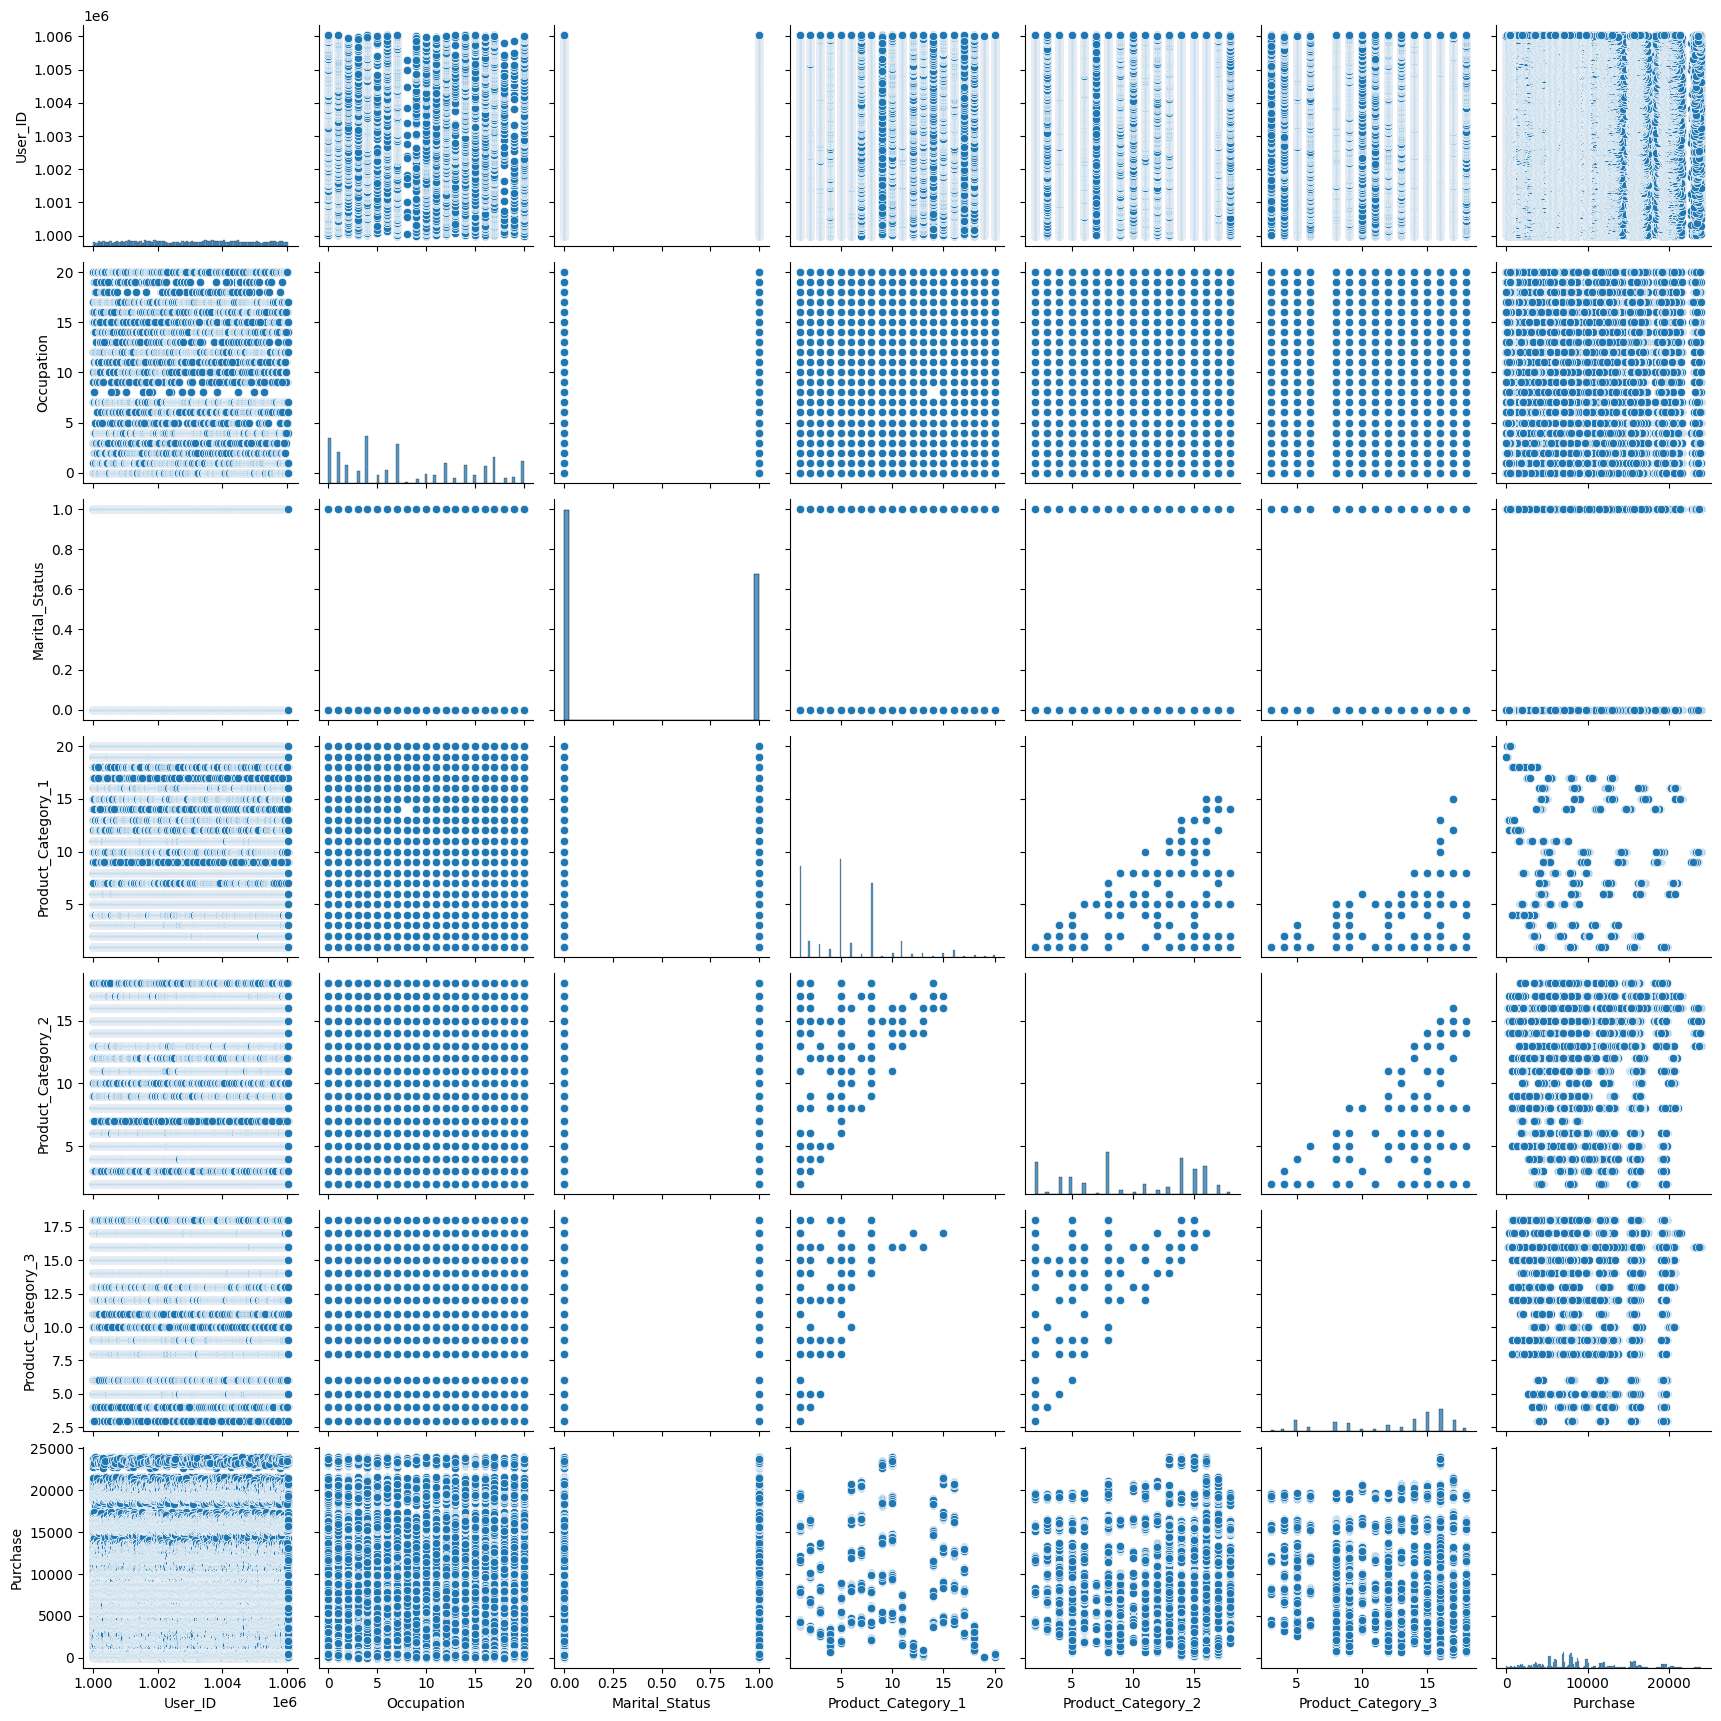

In [ ]:
sns.pairplot( df )

Product_Category1,Product_Category2,Product_Category3 all the categories has multimodal histogram

In [ ]:
droped_column_names = [ "Product_Category_3" ,"Product_Category_2"]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



In [ ]:
df.dropna(inplace = True)

We have dropped the Null vales

In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
dtype: float64


OBSERVATION

---
There is no duplicate entries in this data set


In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


-----------------Unique Values per column--------------------------------




User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

In [ ]:
categorical_columns = ["Stay_In_Current_City_Years" , "City_Category ","Gender", "Product_ID", "Age"]
numeric_columns = [ " User_ID " , "Occupation","Marital_Status", "Product_Category_1 ","Purchase"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
droped_column_names = [ "Age" ]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
droped_column_names = [ "Stay_In_Current_City_Years" ]

df.drop( droped_column_names , axis = 1 ,inplace = True)

Dropping the column Age and Stay_In_Current_City_Years so that the linear regression can be done properly

In [ ]:
df

,User_ID,Product_ID,Occupation,City_Category,Marital_Status,Product_Category_1,Purchase
0,1000001,672,10,0,0,3,8370
1,1000001,2376,10,0,0,1,15200
2,1000001,852,10,0,0,12,1422
3,1000001,828,10,0,0,12,1057
4,1000002,2734,16,2,0,8,7969
...,...,...,...,...,...,...,...
550063,1006033,3567,13,1,1,20,368
550064,1006035,3568,1,2,0,20,371
550065,1006036,3568,15,1,1,20,137
550066,1006038,3568,1,2,0,20,365


In [ ]:
enc = LabelEncoder()
df["Product_ID"] = enc.fit_transform( df["Product_ID"] )
df["City_Category"] = enc.fit_transform( df["City_Category"] )

X = df.drop(["Purchase"]  , axis =1)
y= df["Purchase"]

Label encoding to fit the data properly and handle the unexpected values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)


21907325.839585364

The mean squared error (MSE) value of 21,907,325.84 measures the average squared difference between predicted and actual values. Lower MSE indicates better model performance, with units squared based on the target variable.

In [ ]:
X = df.iloc[:5000].drop(["Purchase"]  , axis =1)
y= df.iloc[:5000]["Purchase"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR
regr  =  SVR()
regr.fit( X_train , y_train)
y_pred =  regr.predict( X_test )
print(mean_squared_error(y_test, y_pred))


24173107.42558516


The mean squared error (MSE) value of 24,173,107.43 from the Support Vector Regression model indicates the average squared difference between predicted and actual values. Lower MSE implies better model performance.